# Soil Viability Prediction for Agriculture - MLOps Project

### Project Overview
This project aims to build a machine learning model that predicts the viability of soil for agricultural purposes using soil characteristics from the Manitoba Soil Survey dataset. The model will classify whether a given soil profile is suitable for agriculture based on features such as soil texture, stoniness, salinity, and erosion across multiple soil horizons.

### Dataset Description
The dataset contains detailed soil attributes, including:
- **Soil Properties**: Variables like `SOILNAME1`, `SALINITY1`, `STONE1`, `EROSION1` represent the properties of the top layer, while `SOILNAME2`, `SALINITY2`, etc., represent deeper layers.
- **Agricultural Capability**: The `AGRI_CAP1` column represents the soil's agricultural capability, serving as the target variable for this classification problem.

### Project Goals
1. **Data Exploration**: Understand the distribution of soil characteristics and identify key features influencing agricultural viability.
2. **Data Preprocessing**: Clean, transform, and encode the dataset for machine learning, addressing missing values, categorical variables, and normalization.
3. **Model Building**: Train and evaluate machine learning models such as Random Forest, XGBoost, or Logistic Regression to predict soil viability.
4. **MLOps Pipeline**: Implement a reproducible pipeline, including model training, evaluation, versioning, and deployment in an MLOps framework.

### Tools and Technologies
- **Jupyter Notebook** for experimentation
- **Python (Pandas, Scikit-learn, XGBoost)** for data analysis and model building
- **MLOps tools** (such as MLflow, Docker, and Kubernetes) for pipeline orchestration and deployment

Let's begin by exploring the dataset and preparing the data for model training!


In [ ]:
import pandas as pd
import numpy as np

# reading dataset into a pandas dataframe 
file_path = 'manitoba_10k_sample.csv'
agric = pd.read_csv(file_path, low_memory=False) 
agric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 149 entries, OBJECTID to SHAPE_Area
dtypes: float64(12), int64(12), object(125)
memory usage: 11.4+ MB


In [3]:
agric.describe()

,OBJECTID,EXTENT1,VARIANT2,EXTENT2,VARIANT3,EXTENT3,SLOPEP1,SLOPEP2,SLOPEP3,LS_MEAN1,...,C_SLOPE,C_GEN,C_DRAIN,C_MAN,C_SALT,C_SOIL,C_SURFTEXT,SPUD_RTNG3,SHAPE_Length,SHAPE_Area
count,10000.000000,10000.000000,34.000000,10000.000000,1.0,10000.000000,10000.000000,9659.000000,9627.000000,9664.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,212.000000,10000.000000,1.000000e+04
mean,57859.436200,87.972000,1.058824,10.150000,1.0,1.878000,-15.300090,-19.528864,-21.065140,-13.131342,...,-0.332500,22.624200,23.968700,3.991600,20.466300,34.429300,21.439400,4.287736,8285.066894,1.966306e+06
std,33833.125322,19.011664,0.238833,16.187146,NaN,5.876782,39.509766,33.418850,32.211535,37.232672,...,45.810606,3.365785,3.817247,48.386763,2.872297,14.848692,8.151415,0.863828,18139.679471,1.119501e+07
min,2.000000,40.000000,1.000000,0.000000,1.0,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,6.000000,6.000000,-99.000000,6.000000,6.000000,-99.000000,1.000000,70.808289,-5.800096e+07
25%,28021.750000,70.000000,1.000000,0.000000,1.0,0.000000,0.200000,-9.000000,-9.000000,0.276710,...,21.000000,22.000000,23.000000,20.000000,21.000000,26.000000,22.000000,4.000000,1907.403825,6.471222e+04
50%,57622.500000,100.000000,1.000000,0.000000,1.0,0.000000,0.500000,-9.000000,-9.000000,0.327880,...,21.000000,23.000000,25.000000,21.000000,21.000000,31.000000,22.000000,4.000000,4048.409295,3.600304e+05
75%,87500.250000,100.000000,1.000000,20.000000,1.0,0.000000,1.000000,0.200000,-9.000000,0.463690,...,21.000000,24.000000,26.000000,31.000000,21.000000,40.000000,24.000000,5.000000,8490.242527,1.308926e+06
max,116565.000000,100.000000,2.000000,50.000000,1.0,30.000000,99.000000,99.000000,22.500000,264.489780,...,26.000000,25.000000,28.000000,49.000000,24.000000,74.000000,26.000000,5.000000,612834.584081,6.289793e+08


In [4]:
agric.head()

,OBJECTID,ORIGINL_RM,REPORT_NUM,REPORT_NAM,SCALE,DATE,MAPUNITNOM,MUNOM1,SOIL_CODE1,SOILNAME1,...,PICNIC2,PICNIC3,CAMP_AREA1,CAMP_AREA2,CAMP_AREA3,PATH1,PATH2,PATH3,SHAPE_Length,SHAPE_Area
0,16565,St Clements,D14,Winnipeg Region,"1:20,000",2022/11/24 00:00:00+00,Li,LBU/xxxx,LBU,Libau,...,NaN,NaN,Fs,NaN,NaN,Fs,NaN,NaN,2626.212751,1.704889e+05
1,20258,St Clements,D14,Winnipeg Region,"1:20,000",2022/11/24 00:00:00+00,Ko,KLI1d/xxxx,KLI,"Kline, clay till substrate var., drained",...,NaN,NaN,Psw,NaN,NaN,Psw,NaN,NaN,10876.902951,4.784108e+05
2,21802,Portage la Prairie,17,Portage la Prairie,"1:20,000",2022/11/24 00:00:00+00,Db-Pa,DHO/xxxs,DHO,Deadhorse,...,Psw,NaN,Pks,Pks,NaN,Ps,Ps,NaN,100934.014809,3.865390e+07
3,86589,RUSSELL,6,Rossburn-Virden,"1:126,720",2022/11/24 00:00:00+00,N (m),DRO/xbxx,DRO,Drokan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2251.373514,1.465452e+05
4,56864,Springfield,D88,Springfield,"1:20,000",2022/11/24 00:00:00+00,RIV,RIV/xxxx,RIV,Red River,...,NaN,NaN,Pks,NaN,NaN,Ps,NaN,NaN,2624.944740,3.893792e+05


In [5]:
agric.columns

Index(['OBJECTID', 'ORIGINL_RM', 'REPORT_NUM', 'REPORT_NAM', 'SCALE', 'DATE',
       'MAPUNITNOM', 'MUNOM1', 'SOIL_CODE1', 'SOILNAME1',
       ...
       'PICNIC2', 'PICNIC3', 'CAMP_AREA1', 'CAMP_AREA2', 'CAMP_AREA3', 'PATH1',
       'PATH2', 'PATH3', 'SHAPE_Length', 'SHAPE_Area'],
      dtype='object', length=149)

In [6]:
# veiwing the columns without being truncated 
list(agric.columns)

['OBJECTID',
 'ORIGINL_RM',
 'REPORT_NUM',
 'REPORT_NAM',
 'SCALE',
 'DATE',
 'MAPUNITNOM',
 'MUNOM1',
 'SOIL_CODE1',
 'SOILNAME1',
 'VARIANT1',
 'PHASE1',
 'CLASS1',
 'EXTENT1',
 'MUNOM2',
 'SOIL_CODE2',
 'SOILNAME2',
 'VARIANT2',
 'PHASE2',
 'CLASS2',
 'EXTENT2',
 'MUNOM3',
 'SOIL_CODE3',
 'SOILNAME3',
 'VARIANT3',
 'PHASE3',
 'CLASS3',
 'EXTENT3',
 'SLOPEP1',
 'SLOPEP2',
 'SLOPEP3',
 'TOPO1',
 'TOPO2',
 'TOPO3',
 'STONE1',
 'STONE2',
 'STONE3',
 'EROSION1',
 'EROSION2',
 'EROSION3',
 'SALINITY1',
 'SALINITY2',
 'SALINITY3',
 'SLOPE_LEN1',
 'SLOPE_LEN2',
 'SLOPE_LEN3',
 'LS_MEAN1',
 'LS_MEAN2',
 'LS_MEAN3',
 'C_ERPOLY',
 'C_AGRI',
 'C_SLOPE',
 'C_GEN',
 'C_DRAIN',
 'C_MAN',
 'C_SALT',
 'C_SOIL',
 'C_SURFTEXT',
 'ERCLS1',
 'ERCLS2',
 'ERCLS3',
 'ERPOLY',
 'ERSYMBOL',
 'AGRI_CAP1',
 'AGRI_CAP2',
 'AGRI_CAP3',
 'AGCAP_CLS1',
 'AGCAP_CLS2',
 'AGCAP_CLS3',
 'AGCAP_GRP1',
 'AGCAP_GRP2',
 'AGCAP_GRP3',
 'SOIL_FACT1',
 'LANDSCAPE1',
 'IRRIG_CLA1',
 'GEN_RATIN1',
 'SOIL_FACT2',
 'LANDSCAPE2',

In [7]:
pd.set_option('display.max_colwidth', None)

In [8]:
agric.head()

,OBJECTID,ORIGINL_RM,REPORT_NUM,REPORT_NAM,SCALE,DATE,MAPUNITNOM,MUNOM1,SOIL_CODE1,SOILNAME1,...,PICNIC2,PICNIC3,CAMP_AREA1,CAMP_AREA2,CAMP_AREA3,PATH1,PATH2,PATH3,SHAPE_Length,SHAPE_Area
0,16565,St Clements,D14,Winnipeg Region,"1:20,000",2022/11/24 00:00:00+00,Li,LBU/xxxx,LBU,Libau,...,NaN,NaN,Fs,NaN,NaN,Fs,NaN,NaN,2626.212751,1.704889e+05
1,20258,St Clements,D14,Winnipeg Region,"1:20,000",2022/11/24 00:00:00+00,Ko,KLI1d/xxxx,KLI,"Kline, clay till substrate var., drained",...,NaN,NaN,Psw,NaN,NaN,Psw,NaN,NaN,10876.902951,4.784108e+05
2,21802,Portage la Prairie,17,Portage la Prairie,"1:20,000",2022/11/24 00:00:00+00,Db-Pa,DHO/xxxs,DHO,Deadhorse,...,Psw,NaN,Pks,Pks,NaN,Ps,Ps,NaN,100934.014809,3.865390e+07
3,86589,RUSSELL,6,Rossburn-Virden,"1:126,720",2022/11/24 00:00:00+00,N (m),DRO/xbxx,DRO,Drokan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2251.373514,1.465452e+05
4,56864,Springfield,D88,Springfield,"1:20,000",2022/11/24 00:00:00+00,RIV,RIV/xxxx,RIV,Red River,...,NaN,NaN,Pks,NaN,NaN,Ps,NaN,NaN,2624.944740,3.893792e+05


In [9]:
agric.shape

(10000, 149)

In [10]:
agric["AGCAP_CLS1"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: AGCAP_CLS1
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [11]:
agric["AGCAP_CLS1"].isnull().value_counts()

AGCAP_CLS1
False    10000
Name: count, dtype: int64

In [12]:
agric["AGCAP_CLS2"].isnull().value_counts()

AGCAP_CLS2
True     6864
False    3136
Name: count, dtype: int64

In [13]:
# Exploring the soil_name columns
agric["SOIL_CODE1"].unique()


array(['LBU', 'KLI', 'DHO', 'DRO', 'RIV', 'FIH', 'LNO', '$ZZ', 'OBO',
       'SUE', 'PER', 'NPK', 'BKR', 'MRQ', 'ECK', 'MNV', 'GYV', 'BED',
       'DNH', 'JAY', '$ER', 'BYH', 'IWO', 'TDP', 'GOO', 'SKL', 'LRY',
       'DCS', 'RLD', 'MEH', 'LLT', 'CME', 'VRC', 'PPL', 'GRG', 'PGU',
       'CRN', 'WHL', 'FOY', 'RGD', 'GDH', 'FTY', 'DOB', 'RBN', 'BSF',
       'SNT', 'NPS', 'OOK', 'CKG', 'WWC', 'HOT', 'ARG', 'CKD', 'ASS',
       'HRY', 'SCK', 'KIC', 'MGT', 'SHX', 'SGO', 'NDL', 'BSH', 'WKD',
       'LOP', 'JYL', 'CBY', 'PVK', 'FFD', 'AND', 'OKL', 'SOU', '$UL',
       'MEB', 'LUD', 'LDM', 'GRA', 'FFX', 'JKE', 'GNL', 'DOT', 'LVH',
       'SXP', 'VFF', 'TGR', 'PDA', 'SDV', 'GSI', 'PGK', 'DRI', 'SDI',
       'CXV', 'THG', 'LUR', 'DBW', 'CXT', 'VST', 'OVO', 'HRD', 'PME',
       'BAM', 'HHF', 'ISF', 'GVS', 'OHZ', 'CLN', 'BVR', 'VDL', 'WTV',
       'STD', 'CIO', 'GRR', 'EWT', 'SWZ', 'GBO', 'GLK', 'OIV', 'CAV',
       'WRN', 'NWS', 'AWH', 'NBG', 'ATN', 'DGF', 'PBI', 'RSI', 'HHV',
       'SLB', 'RAM',

In [14]:
agric["SOIL_CODE2"].unique()


array([nan, 'PME', 'CZW', 'OBO', 'OZA', 'RGD', 'EGF', 'KMK', 'MEB', 'DRO',
       'IWO', 'GBO', 'ONH', 'CAY', '$MH', 'ASS', 'HOT', 'WWD', 'SHX',
       'CBS', 'PTU', 'VRC', 'ANL', 'WHL', 'SWZ', 'BMG', 'BED', 'PDA',
       'LSD', 'LVH', 'LOP', 'RUF', 'TDP', ' ', 'NDL', 'WKW', 'CKG', 'SOU',
       'SCY', 'RAM', 'TEK', 'RLD', 'VFF', 'WKD', 'MNT', 'SUE', 'ZIM',
       'GUO', 'LUR', 'TGR', 'VLW', 'LSL', 'HIB', 'PLN', 'CBF', 'BAX',
       'SEE', 'HHY', 'DCS', 'MXT', 'OIV', 'HRG', 'BSF', 'MOW', 'HAT',
       'MFI', 'RYS', 'TLI', 'CSE', 'TUV', 'PPL', 'CXV', 'MOT', 'DVD',
       'FYL', 'SRE', 'PGE', 'RBN', '$ER', 'CBY', 'DOM', 'WDN', 'CWF',
       'POX', 'AND', 'CLL', 'KRN', 'CRN', 'PAN', 'GRR', 'TWC', 'VLY',
       'RGT', 'NGT', 'CXF', 'DOB', 'PLE', 'PUO', 'SLN', 'FKR', 'PMG',
       'KLI', 'WWC', 'EWS', 'SMM', 'SNT', 'CAV', 'RTV', 'LRY', 'LLT',
       'BVR', 'OVO', 'ARS', 'SKL', 'GFS', 'MXI', 'SFT', 'GYV', 'OWK',
       'RMP', 'MRH', 'GOL', 'CVA', 'KIC', '$AR', 'RIV', 'SPG', 'HND',
       'FR

In [15]:
agric["AGRI_CAP1"].info()
print("\n")
agric["AGRI_CAP1"].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: AGRI_CAP1
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB




AGRI_CAP1
5W     1421
2W     1223
3W      620
5M      511
4M      479
       ... 
4P        1
3IN       1
6NW       1
7E        1
7N        1
Name: count, Length: 101, dtype: int64

In [16]:
agric["AGRI_CAP1"].unique()


array(['2D', '3W', '3N', '5W', '2W', '3I', '2X', '$ZZ', 'O3W', '4M',
       '5IW', '4T', '5M', '1', '3M', '7T', 'O5W1', '4DP', '6M', '2M',
       '3MW', 'O5WD', 'O4WL', '3T', '6W', '2T', '2MT', '$UL', '4N', '3NW',
       '3D', 'O6WF', '6T', 'O7W', 'O4W', '2MP', '4D', '4W', '5WT', '2P',
       '2TE', '2IW', '4R', '2WP', '5P', '6E', '2I', '4MT', '7M', '3P',
       '3MT', '3X', '2DW', '7W', '2WT', '3MN', '5T', '7TE', '3TE', '6IW',
       '5TE', '$UR', 'O6WD', '5MT', '3TD', '4ME', '2IT', '6TE', '4RP',
       '3DW', '3TP', '7R', '4DN', '2TD', '4TE', '2DP', '5RP', '3ME',
       '3IT', '4IN', '3IM', '6MT', '3DN', '5N', '4RD', '4IW', '2TP', '6P',
       '3MP', '2E', '3E', '5MP', '6ME', '5ME', '4P', '2ME', '3IN', '6NW',
       '7E', '5WP', '7N'], dtype=object)

In [17]:
agric["AGRI_CAP1"].unique()


array(['2D', '3W', '3N', '5W', '2W', '3I', '2X', '$ZZ', 'O3W', '4M',
       '5IW', '4T', '5M', '1', '3M', '7T', 'O5W1', '4DP', '6M', '2M',
       '3MW', 'O5WD', 'O4WL', '3T', '6W', '2T', '2MT', '$UL', '4N', '3NW',
       '3D', 'O6WF', '6T', 'O7W', 'O4W', '2MP', '4D', '4W', '5WT', '2P',
       '2TE', '2IW', '4R', '2WP', '5P', '6E', '2I', '4MT', '7M', '3P',
       '3MT', '3X', '2DW', '7W', '2WT', '3MN', '5T', '7TE', '3TE', '6IW',
       '5TE', '$UR', 'O6WD', '5MT', '3TD', '4ME', '2IT', '6TE', '4RP',
       '3DW', '3TP', '7R', '4DN', '2TD', '4TE', '2DP', '5RP', '3ME',
       '3IT', '4IN', '3IM', '6MT', '3DN', '5N', '4RD', '4IW', '2TP', '6P',
       '3MP', '2E', '3E', '5MP', '6ME', '5ME', '4P', '2ME', '3IN', '6NW',
       '7E', '5WP', '7N'], dtype=object)

In [18]:
pd.set_option('display.max_colwidth', None)

In [19]:
pd.set_option('display.max_colwidth', None)
agric.head(30)

,OBJECTID,ORIGINL_RM,REPORT_NUM,REPORT_NAM,SCALE,DATE,MAPUNITNOM,MUNOM1,SOIL_CODE1,SOILNAME1,...,PICNIC2,PICNIC3,CAMP_AREA1,CAMP_AREA2,CAMP_AREA3,PATH1,PATH2,PATH3,SHAPE_Length,SHAPE_Area
0,16565,St Clements,D14,Winnipeg Region,"1:20,000",2022/11/24 00:00:00+00,Li,LBU/xxxx,LBU,Libau,...,NaN,NaN,Fs,NaN,NaN,Fs,NaN,NaN,2626.212751,1.704889e+05
1,20258,St Clements,D14,Winnipeg Region,"1:20,000",2022/11/24 00:00:00+00,Ko,KLI1d/xxxx,KLI,"Kline, clay till substrate var., drained",...,NaN,NaN,Psw,NaN,NaN,Psw,NaN,NaN,10876.902951,4.784108e+05
2,21802,Portage la Prairie,17,Portage la Prairie,"1:20,000",2022/11/24 00:00:00+00,Db-Pa,DHO/xxxs,DHO,Deadhorse,...,Psw,NaN,Pks,Pks,NaN,Ps,Ps,NaN,100934.014809,3.865390e+07
3,86589,RUSSELL,6,Rossburn-Virden,"1:126,720",2022/11/24 00:00:00+00,N (m),DRO/xbxx,DRO,Drokan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2251.373514,1.465452e+05
4,56864,Springfield,D88,Springfield,"1:20,000",2022/11/24 00:00:00+00,RIV,RIV/xxxx,RIV,Red River,...,NaN,NaN,Pks,NaN,NaN,Ps,NaN,NaN,2624.944740,3.893792e+05
5,84009,BIFROST,12,Fisher-Teulon,"1:100,000",2022/11/24 00:00:00+00,F,FIH/xxxx,FIH,Fisher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6805.309340,6.068625e+05
6,103402,MINIOTA,6,Rossburn-Virden,"1:126,720",2022/11/24 00:00:00+00,L,LNO/xb1x,LNO,Lenore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2337.789663,9.325090e+04
7,98413,St Clements,15,Lac du Bonnet,"1:126,720",2022/11/24 00:00:00+00,ZZ,$ZZ/xxxx,$ZZ,Water,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3498.413390,4.111979e+05
8,25315,Portage la Prairie,17,Portage la Prairie,"1:20,000",2022/11/24 00:00:00+00,Oc,OBOd/xxxx,OBO,"Osborne, drained",...,NaN,NaN,Psw,NaN,NaN,Psw,NaN,NaN,1549.029957,3.722998e+04
9,33077,South Norfolk,D74,South Norfolk,"1:20,000",2022/11/24 00:00:00+00,SUE,SUE/xxxx,SUE,St Claude,...,NaN,NaN,Pw,NaN,NaN,Fsw,NaN,NaN,689.696056,2.965563e+04


In [20]:
agric[["AGRI_CAP1", "AGRI_CAP2"]].head(30)

,AGRI_CAP1,AGRI_CAP2
0,2D,NaN
1,3W,NaN
2,3N,2W
3,5W,NaN
4,2W,NaN
5,3I,NaN
6,2X,4D
7,$ZZ,NaN
8,3W,NaN
9,3W,NaN


In [21]:
agric["AGRI_CAP2"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: AGRI_CAP2
Non-Null Count  Dtype 
--------------  ----- 
3136 non-null   object
dtypes: object(1)
memory usage: 78.3+ KB


In [22]:
agric[["PATH1", "PATH2", "PATH3"]].head(30)

,PATH1,PATH2,PATH3
0,Fs,NaN,NaN
1,Psw,NaN,NaN
2,Ps,Ps,NaN
3,NaN,NaN,NaN
4,Ps,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,Psw,NaN,NaN
9,Fsw,NaN,NaN


# Insights and Soil Characteristics Selection

### Project Insights So Far
Through our exploration of the Manitoba soil dataset, we have gained several key insights regarding the structure and content of the data:
- The dataset contains a wealth of information on both soil characteristics and land-use classifications. It includes columns not only related to soil properties but also for recreational areas, administrative data, and GIS path references.
- Our focus is on predicting **soil suitability for agriculture**. Therefore, columns that are directly related to land-use designations like **PICNIC** and **CAMP_AREA** are unlikely to contribute to agricultural classification and can be dropped to simplify the model.
- We identified that **AGRI_CAP1** serves as the primary classification for soil agricultural capability, with **AGRI_CAP2** likely providing secondary or conditional classification.
- The **PATH1, PATH2, and PATH3** columns likely contain file paths or references to external GIS data, which are irrelevant for our classification task and can be excluded from the analysis.

### Identifying Relevant Soil Characteristics
To focus on the soil's physical and chemical properties, we selected a group of columns that represent crucial soil characteristics affecting agricultural viability. These include:
- **Soil Type and Classification**: `SOILNAME1`, `SOIL_CODE1`, `SOILNAME2`, etc.
- **Soil Properties**: Attributes like **salinity**, **stoniness**, **erosion**, and **slope** across different soil layers, such as `SALINITY1`, `STONE1`, `EROSION1`, and `SLOPEP1`.
- **Soil Phase and Variants**: Columns such as `PHASE1`, `VARIANT1`, which describe specific small-scale variations in soil that may affect land use.
- **Irrigation Capability**: `IRRIG_CLA1` and `IRRIG_CLA2`, which represent the soil's ability to support irrigation.

By focusing on these key characteristics, we can build a more accurate model for predicting soil suitability for agriculture. This process has helped us refine the dataset to only include relevant variables for our classification task, ensuring a cleaner and more efficient model development workflow.


In [23]:
soil_characteristics = [
    "SOILNAME1", "SOILNAME2", "SOILNAME3", 
    "SOIL_CODE1", "SOIL_CODE2", "SOIL_CODE3", 
    "CLASS1", "CLASS2", "CLASS3", 
    "SALINITY1", "SALINITY2", "SALINITY3", 
    "SLOPEP1", "SLOPEP2", "SLOPEP3", 
    "STONE1", "STONE2", "STONE3", 
    "EROSION1", "EROSION2", "EROSION3", 
    "TOPO1", "TOPO2", "TOPO3", 
    "PHASE1", "PHASE2", "PHASE3", 
    "VARIANT1", "VARIANT2", "VARIANT3", 
    "IRRIG_CLA1", "IRRIG_CLA2"
]

# putting all soil characteristics into one dataframe
pd.set_option('display.max_colwidth', None)
agric[soil_characteristics].head(30)


,SOILNAME1,SOILNAME2,SOILNAME3,SOIL_CODE1,SOIL_CODE2,SOIL_CODE3,CLASS1,CLASS2,CLASS3,SALINITY1,...,TOPO2,TOPO3,PHASE1,PHASE2,PHASE3,VARIANT1,VARIANT2,VARIANT3,IRRIG_CLA1,IRRIG_CLA2
0,Libau,NaN,NaN,LBU,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3k A,NaN
1,"Kline, clay till substrate var., drained",NaN,NaN,KLI,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,NaN,d,NaN,NaN,1.0,NaN,NaN,4kw A,NaN
2,Deadhorse,Plum Coulee,NaN,DHO,PME,NaN,xxxs,xxxx,NaN,s,...,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3sw A,3kw A
3,Drokan,NaN,NaN,DRO,NaN,NaN,xbxx,NaN,NaN,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4w A,NaN
4,Red River,NaN,NaN,RIV,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4kx A,NaN
5,Fisher,NaN,NaN,FIH,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3w Bi,NaN
6,Lenore,Cadzow,Drokan,LNO,CZW,DRO,xb1x,xbxs,xxxx,x,...,b,x,NaN,NaN,NaN,NaN,NaN,NaN,2kx A,4dk A
7,Water,NaN,NaN,$ZZ,NaN,NaN,xxxx,NaN,NaN,$ZZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$ZZ,NaN
8,"Osborne, drained",NaN,NaN,OBO,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,NaN,d,NaN,NaN,NaN,NaN,NaN,4kw A,NaN
9,St Claude,NaN,NaN,SUE,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3w A,NaN


In [24]:
agric[["SALINITY1", "SALINITY2", "SALINITY3", 
    "SLOPEP1", "SLOPEP2", "SLOPEP3", 
    "STONE1", "STONE2", "STONE3", 
    "EROSION1", "EROSION2", "EROSION3"]].head(30)

,SALINITY1,SALINITY2,SALINITY3,SLOPEP1,SLOPEP2,SLOPEP3,STONE1,STONE2,STONE3,EROSION1,EROSION2,EROSION3
0,x,NaN,NaN,0.5,-9.0,-9.0,x,NaN,NaN,x,NaN,NaN
1,x,NaN,NaN,0.5,-9.0,-9.0,x,NaN,NaN,x,NaN,NaN
2,s,x,NaN,0.5,0.2,-9.0,x,x,NaN,x,x,NaN
3,x,NaN,NaN,1.0,-9.0,-9.0,x,NaN,NaN,x,NaN,NaN
4,x,NaN,NaN,-99.0,-99.0,-99.0,x,NaN,NaN,x,NaN,NaN
5,x,NaN,NaN,1.0,-9.0,-9.0,x,NaN,NaN,x,NaN,NaN
6,x,s,x,1.0,1.0,0.5,1,x,x,x,x,x
7,$ZZ,NaN,NaN,-9.0,-9.0,-9.0,$ZZ,NaN,NaN,$ZZ,NaN,NaN
8,x,NaN,NaN,0.5,-9.0,-9.0,x,NaN,NaN,x,NaN,NaN
9,x,NaN,NaN,0.5,-9.0,-9.0,x,NaN,NaN,x,NaN,NaN


In [25]:
print(agric["EROSION3"].isnull().value_counts())

agric["EROSION3"].unique()

EROSION3
True     8925
False    1075
Name: count, dtype: int64


array([nan, 'x', 'ORG', '1', '3', '2'], dtype=object)

In [26]:
print(agric["EROSION2"].isnull().value_counts())

agric["EROSION2"].unique()

EROSION2
True     6864
False    3136
Name: count, dtype: int64


array([nan, 'x', 'ORG', '1', '2', '3', 'o', '$ZZ'], dtype=object)

In [27]:
print(agric["EROSION1"].isnull().value_counts())

agric["EROSION1"].unique()

EROSION1
False    10000
Name: count, dtype: int64


array(['x', '$ZZ', 'ORG', '3', '1', '$UL', 'o', '2', '$UR'], dtype=object)

### Interpretation of Erosion Column Values

The **EROSION** columns in the dataset contain values that represent different levels or classifications of erosion affecting the soil. Here’s what each value likely means:

- **'x'**: Indicates **no erosion** or minimal erosion, meaning the soil is generally stable.
- **'$ZZ'**: A placeholder for **missing or unclassified data**, where erosion information is not available.
- **'ORG'**: Refers to **organic soils**, which are formed from organic matter and may have different erosion characteristics than mineral soils.
- **'1'**: Represents **slight erosion**, meaning minimal soil loss that does not significantly impact land use.
- **'2'**: Refers to **moderate erosion**, which indicates that some soil loss has occurred, but the land can still be used with proper management.
- **'3'**: Signifies **more severe erosion**, which may limit the soil's agricultural potential without intervention.
- **'$UL'** and **'$UR'**: Likely represent **Unclassified Land** or **Urban Land**, where the land use may not be agricultural, and erosion is not assessed.
- **'o'**: Another symbol indicating **minimal erosion**, similar to 'x'.

These values help determine the soil's stability and its susceptibility to erosion, which can significantly impact its agricultural viability and the management practices needed.


In [28]:
print(agric["SALINITY1"].isnull().value_counts())

agric["EROSION1"].unique()

SALINITY1
False    10000
Name: count, dtype: int64


array(['x', '$ZZ', 'ORG', '3', '1', '$UL', 'o', '2', '$UR'], dtype=object)

In [29]:
print(agric["SALINITY2"].isnull().value_counts())

agric["EROSION1"].unique()

SALINITY2
True     6864
False    3136
Name: count, dtype: int64


array(['x', '$ZZ', 'ORG', '3', '1', '$UL', 'o', '2', '$UR'], dtype=object)

In [30]:
print(agric["SALINITY3"].isnull().value_counts())

agric["EROSION1"].unique()

SALINITY3
True     8925
False    1075
Name: count, dtype: int64


array(['x', '$ZZ', 'ORG', '3', '1', '$UL', 'o', '2', '$UR'], dtype=object)

In [31]:
c_columns = [
    "C_ERPOLY", 
    "C_AGRI", 
    "C_SLOPE", 
    "C_GEN", 
    "C_DRAIN", 
    "C_MAN", 
    "C_SALT", 
    "C_SOIL", 
    "C_SURFTEXT"
]
#exploring the C_ columns 
pd.set_option('display.max_colwidth', None)

agric[c_columns].head(20)

,C_ERPOLY,C_AGRI,C_SLOPE,C_GEN,C_DRAIN,C_MAN,C_SALT,C_SOIL,C_SURFTEXT
0,22.0,22,21,23,23,33,21,64,21
1,21.0,23,21,24,26,40,21,40,21
2,22.0,23,21,23,25,33,22,33,21
3,21.0,25,21,24,26,31,21,29,22
4,-99.0,22,-99,24,25,-99,21,33,21
5,23.0,23,21,23,25,20,21,22,22
6,21.0,22,21,22,23,20,22,28,22
7,6.0,6,6,6,6,6,6,6,6
8,21.0,23,21,24,26,40,21,40,21
9,22.0,23,21,23,25,20,21,31,23


In [32]:
print(agric["C_SLOPE"].isnull().value_counts())

agric["C_SLOPE"].unique()

C_SLOPE
False    10000
Name: count, dtype: int64


array([ 21, -99,   6,  24,  22,  26,  23,  16,  25])

In [33]:
agric[[
    "SOILNAME1", "SOILNAME2", "SOILNAME3", 
    "SOIL_CODE1", "SOIL_CODE2", "SOIL_CODE3", 
    "CLASS1", "CLASS2", "CLASS3", 
    "SALINITY1", "SALINITY2", "SALINITY3", 
    "SLOPEP1", "SLOPEP2", "SLOPEP3", 
    "STONE1", "STONE2", "STONE3", 
    "EROSION1", "EROSION2", "EROSION3", 
    "TOPO1", "TOPO2", "TOPO3", 
    "PHASE1", "PHASE2", "PHASE3", 
    "VARIANT1", "VARIANT2", "VARIANT3", 
    "IRRIG_CLA1", "IRRIG_CLA2", "GEN_RATIN1"
]].head(20)

,SOILNAME1,SOILNAME2,SOILNAME3,SOIL_CODE1,SOIL_CODE2,SOIL_CODE3,CLASS1,CLASS2,CLASS3,SALINITY1,...,TOPO3,PHASE1,PHASE2,PHASE3,VARIANT1,VARIANT2,VARIANT3,IRRIG_CLA1,IRRIG_CLA2,GEN_RATIN1
0,Libau,NaN,NaN,LBU,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3k A,NaN,Fair
1,"Kline, clay till substrate var., drained",NaN,NaN,KLI,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,d,NaN,NaN,1.0,NaN,NaN,4kw A,NaN,Poor
2,Deadhorse,Plum Coulee,NaN,DHO,PME,NaN,xxxs,xxxx,NaN,s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3sw A,3kw A,Fair
3,Drokan,NaN,NaN,DRO,NaN,NaN,xbxx,NaN,NaN,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4w A,NaN,Poor
4,Red River,NaN,NaN,RIV,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4kx A,NaN,Poor
5,Fisher,NaN,NaN,FIH,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3w Bi,NaN,Fair
6,Lenore,Cadzow,Drokan,LNO,CZW,DRO,xb1x,xbxs,xxxx,x,...,x,NaN,NaN,NaN,NaN,NaN,NaN,2kx A,4dk A,Good
7,Water,NaN,NaN,$ZZ,NaN,NaN,xxxx,NaN,NaN,$ZZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$ZZ,NaN,$ZZ
8,"Osborne, drained",NaN,NaN,OBO,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,d,NaN,NaN,NaN,NaN,NaN,4kw A,NaN,Poor
9,St Claude,NaN,NaN,SUE,NaN,NaN,xxxx,NaN,NaN,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3w A,NaN,Fair


In [34]:
agric[['SLOPEP1',  
'SLOPEP2',   
'SLOPEP3', 
'SLOPE_LEN1',  
'SLOPE_LEN2',  
'SLOPE_LEN3',  
'LS_MEAN1',
'LS_MEAN2',
'LS_MEAN3']].head(30)

,SLOPEP1,SLOPEP2,SLOPEP3,SLOPE_LEN1,SLOPE_LEN2,SLOPE_LEN3,LS_MEAN1,LS_MEAN2,LS_MEAN3
0,0.5,-9.0,-9.0,3.0,NaN,NaN,0.32788,0.00000,0.00000
1,0.5,-9.0,-9.0,3.0,NaN,NaN,0.32788,0.00000,0.00000
2,0.5,0.2,-9.0,3.0,3,NaN,0.32788,0.27313,0.00000
3,1.0,-9.0,-9.0,2,-,-,0.27671,0.00000,0.00000
4,-99.0,-99.0,-99.0,NaN,NaN,NaN,-99.00000,-99.00000,-99.00000
5,1.0,-9.0,-9.0,3,-,-,0.42868,0.00000,0.00000
6,1.0,1.0,0.5,2.0,2,2,0.27671,0.27671,0.21164
7,-9.0,-9.0,-9.0,NaN,NaN,NaN,0.68329,0.00000,0.00000
8,0.5,-9.0,-9.0,3.0,NaN,NaN,0.32788,0.00000,0.00000
9,0.5,-9.0,-9.0,3.0,NaN,NaN,0.32788,0.00000,0.00000


In [35]:
print(agric['SLOPEP1'].value_counts())
print('\n')
print(agric['SLOPEP2'].value_counts())
print('\n')
print(agric['SLOPEP3'].value_counts())



SLOPEP1
 0.5     4258
-99.0    1762
 3.5     1200
 1.0     1004
 7.5      495
-9.0      377
 0.2      297
 12.5     260
 22.5     124
 37.5      78
 0.1       72
 85.0      45
 7.0       12
 57.5       5
 12.0       5
 99.0       5
 1.5        1
Name: count, dtype: int64


SLOPEP2
-9.0     5771
-99.0    1422
 0.5     1122
 1.0      732
 3.5      343
 0.2      145
 7.5       33
 0.1       32
 12.5      29
 22.5      15
 12.0       6
 99.0       4
 7.0        2
 37.5       2
 57.5       1
Name: count, dtype: int64


SLOPEP3
-9.0     7306
-99.0    1394
 0.5      696
 0.2       77
 3.5       77
 1.0       47
 7.5       14
 22.5       5
 0.1        5
 12.0       3
 12.5       2
 7.0        1
Name: count, dtype: int64


# Feature Engineering: Step 1 - Initial Data Processing and Transformation

Our first step in feature engineering focuses on preparing and transforming our soil data columns to maximize their predictive value for agricultural capability. Here's what we'll accomplish:

For Classification Columns (C_AGRI, C_SLOPE, C_DRAIN, C_SALT, C_SURFTEXT):
- These columns contain standardized numeric codes (like 21-28 for C_AGRI) that represent categorical information
- We'll transform these codes to make them more interpretable
- For example, C_AGRI code 21 actually means Agricultural Class 1, so we'll subtract 20 to get the true class value
- This transformation maintains the ordinal nature of these classifications while making them more intuitive

For Extent Columns (EXTENT1, EXTENT2, EXTENT3):
- These represent percentages of different soil types in a given area
- We'll verify they sum to 100% for each observation
- Missing values here could indicate important patterns about soil composition
- We'll create a ratio feature to capture the relationship between primary and secondary soil types

For Management and Erosion Columns (MANCON1-3, ERCLS1-3, ERPOLY):
- These contain categorical codes that describe specific conditions
- We'll create boolean flags for critical management concerns
- For erosion classes, we'll develop a weighted risk score using ERPOLY as a guide
- Multiple columns for the same measure (1,2,3) will be combined into meaningful aggregate features



In [36]:
soil_features = {
    # Base soil characteristics - fundamental properties
    'soil_identifier_columns': [
        'SOIL_CODE1',  # Three-character standardized soil code
        'SOILNAME1'    # Full soil series name
    ],
    
    # Classification features - standardized measurements
    'classification_columns': [
        'C_AGRI',     # Agricultural capability classification
        'C_SLOPE',    # Standardized slope categories
        'C_DRAIN',    # Drainage classification
        'C_SALT',     # Salinity levels
        'C_SOIL',     
        'C_SURFTEXT'  # Surface texture classification
    ],
    
    # Extent columns - soil type proportions
    'extent_columns': [
        'EXTENT1',
        'EXTENT2',
        'EXTENT3'
    ],
    
    # Management columns - farming considerations
    'management_columns': [
        'MANCON1',
        'MANCON2',
        'MANCON3'
    ],
    
    # Erosion risk columns - soil stability
    'erosion_columns': [
        'ERCLS1',
        'ERCLS2',
        'ERCLS3',
        'ERPOLY'
    ]
}

# Target variable remains the same
target_column = 'C_AGRI'

# Updated all features list
all_feature_columns = (
    soil_features['soil_identifier_columns'] +
    soil_features['classification_columns'] +
    soil_features['extent_columns'] +
    soil_features['management_columns'] +
    soil_features['erosion_columns']
)

In [37]:
agric[all_feature_columns].head(30)

,SOIL_CODE1,SOILNAME1,C_AGRI,C_SLOPE,C_DRAIN,C_SALT,C_SOIL,C_SURFTEXT,EXTENT1,EXTENT2,EXTENT3,MANCON1,MANCON2,MANCON3,ERCLS1,ERCLS2,ERCLS3,ERPOLY
0,LBU,Libau,22,21,23,21,64,21,100,0,0,F,NaN,NaN,L,N,N,L
1,KLI,"Kline, clay till substrate var., drained",23,21,26,21,40,21,100,0,0,FW,NaN,NaN,N,N,N,N
2,DHO,Deadhorse,23,21,25,22,33,21,50,50,0,F,F,NaN,L,L,N,L
3,DRO,Drokan,25,21,26,21,29,22,100,0,0,W,NaN,NaN,N,N,N,N
4,RIV,Red River,22,-99,25,21,33,21,100,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,FIH,Fisher,23,21,25,21,22,22,100,0,0,No Constraints,NaN,NaN,M,N,N,M
6,LNO,Lenore,22,21,23,22,28,22,70,20,10,No Constraints,No Constraints,W,L,N,N,N
7,$ZZ,Water,6,6,6,6,6,6,100,0,0,Water,NaN,NaN,NaN,N,N,NaN
8,OBO,"Osborne, drained",23,21,26,21,40,21,100,0,0,FW,NaN,NaN,N,N,N,N
9,SUE,St Claude,23,21,25,21,31,23,100,0,0,No Constraints,NaN,NaN,L,N,N,L


In [38]:
agric[soil_features['management_columns']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MANCON1  8233 non-null   object
 1   MANCON2  2461 non-null   object
 2   MANCON3  927 non-null    object
dtypes: object(3)
memory usage: 234.5+ KB


In [39]:
print(agric["MANCON1"].unique())
print(agric["MANCON2"].unique())
print(agric["MANCON3"].unique())

['F' 'FW' 'W' nan 'No Constraints' 'Water' 'C' 'T' 'Eroded slopes'
 'Organic' 'C T' 'WT' 'CW' 'Unclassified' 'Marsh' 'B' 'FWT' 'F T' 'TB'
 'Rock' 'CWT']
[nan 'F' 'No Constraints' 'FW' 'Organic' 'W' 'C' 'Marsh' 'CW' 'B' 'Rock'
 'T' 'C T' 'TB' 'Eroded slopes']
[nan 'W' 'Organic' 'FW' 'C' 'F' 'No Constraints' 'B' 'CW' 'T' 'Rock' 'TB'
 'W B' 'Marsh']



Analysis for MANCON1

Total unique values: 20
Missing values: 1767

Top 10 most common values:
No Constraints: 2433 occurrences (29.55%)
C: 1266 occurrences (15.38%)
W: 1039 occurrences (12.62%)
F: 683 occurrences (8.30%)
CW: 486 occurrences (5.90%)
T: 473 occurrences (5.75%)
Organic: 470 occurrences (5.71%)
FW: 409 occurrences (4.97%)
Water: 348 occurrences (4.23%)
C T: 160 occurrences (1.94%)


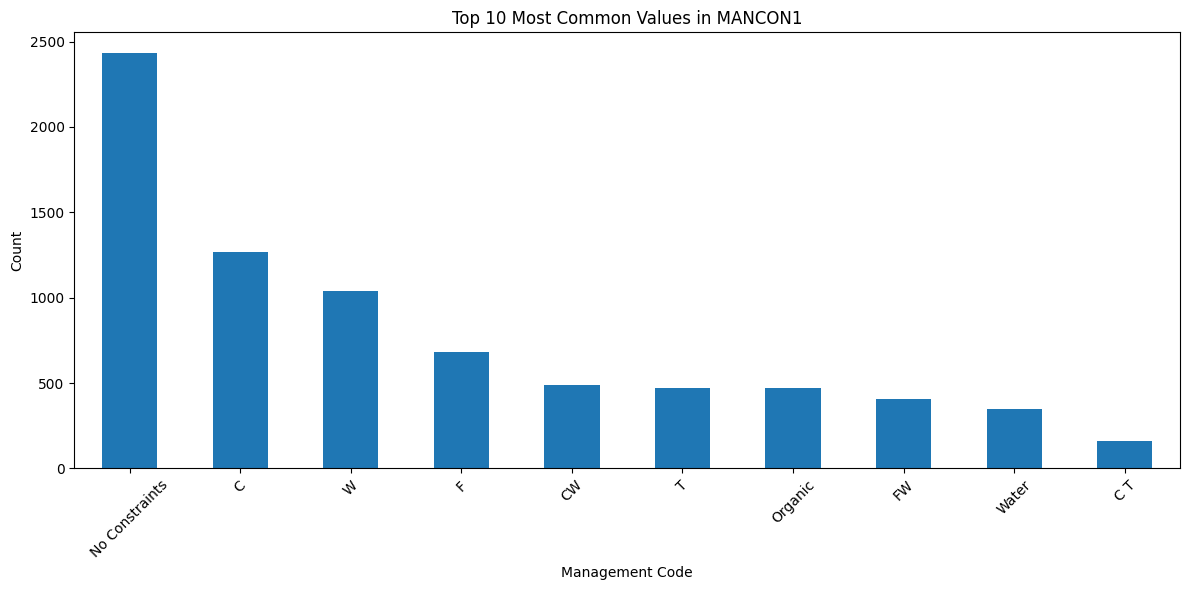


Analysis for MANCON2

Total unique values: 14
Missing values: 7539

Top 10 most common values:
No Constraints: 1148 occurrences (46.65%)
W: 367 occurrences (14.91%)
C: 321 occurrences (13.04%)
Organic: 166 occurrences (6.75%)
FW: 136 occurrences (5.53%)
F: 125 occurrences (5.08%)
CW: 108 occurrences (4.39%)
Marsh: 32 occurrences (1.30%)
B: 27 occurrences (1.10%)
Rock: 10 occurrences (0.41%)


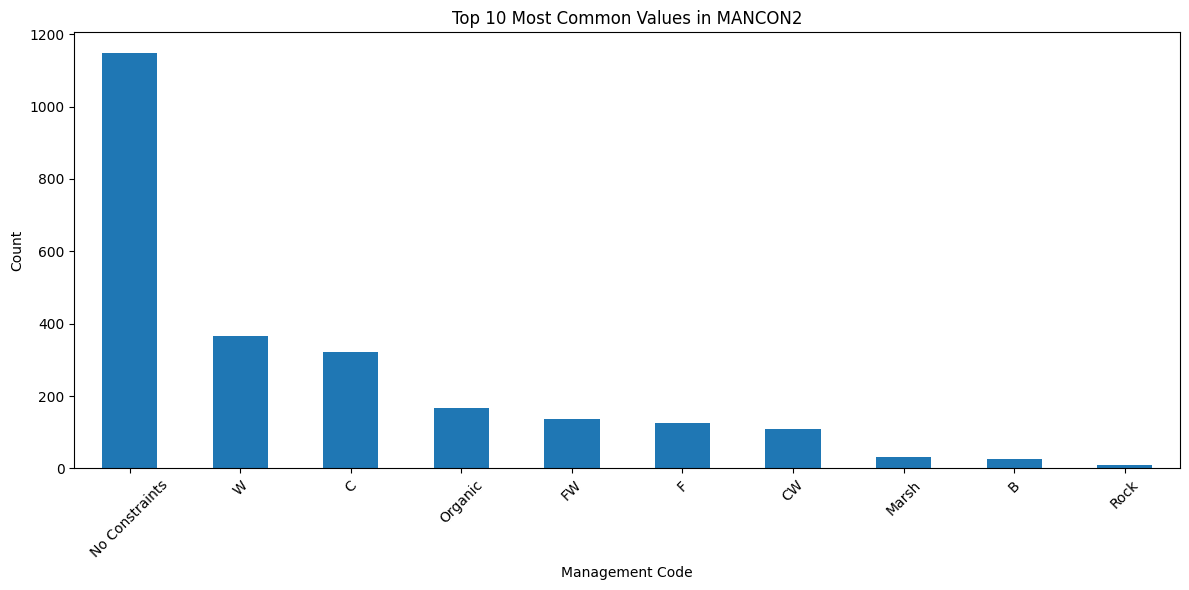


Analysis for MANCON3

Total unique values: 13
Missing values: 9073

Top 10 most common values:
W: 574 occurrences (61.92%)
FW: 100 occurrences (10.79%)
C: 70 occurrences (7.55%)
No Constraints: 57 occurrences (6.15%)
CW: 41 occurrences (4.42%)
Organic: 37 occurrences (3.99%)
B: 21 occurrences (2.27%)
F: 14 occurrences (1.51%)
Marsh: 5 occurrences (0.54%)
Rock: 3 occurrences (0.32%)


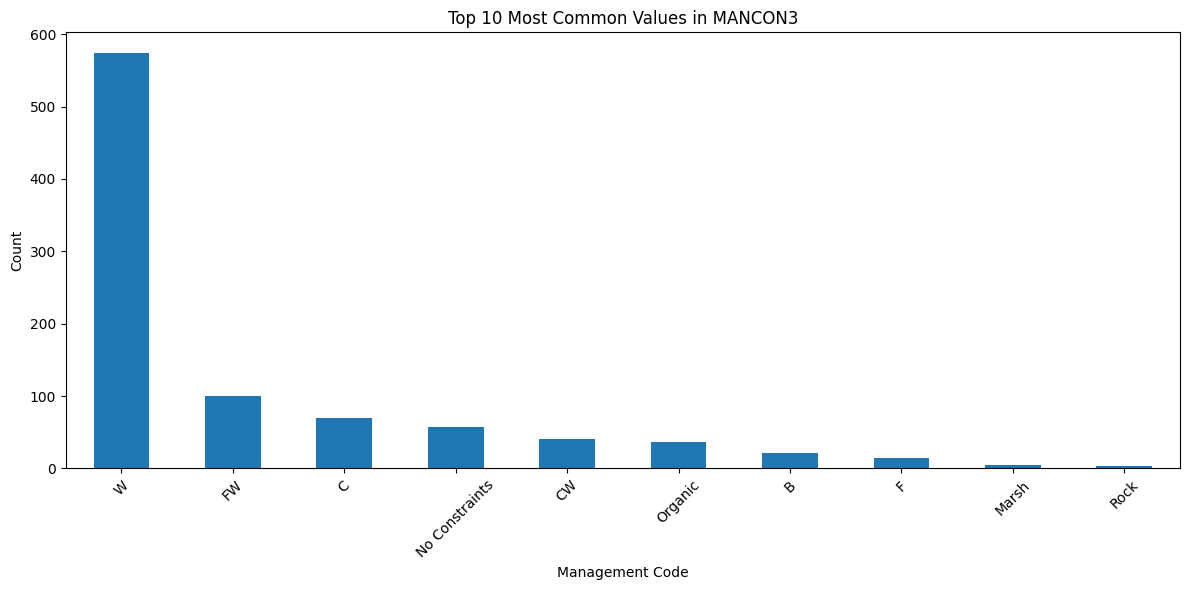


Detailed MANCON1 value counts:
MANCON1
No Constraints    2433
C                 1266
W                 1039
F                  683
CW                 486
T                  473
Organic            470
FW                 409
Water              348
C T                160
Eroded slopes      139
WT                 105
Marsh               75
B                   43
Unclassified        38
Rock                33
F T                 19
TB                  10
CWT                  3
FWT                  1
Name: count, dtype: int64

Cross-tabulation of MANCON1 and MANCON2:
MANCON2          B    C  C T  CW  Eroded slopes   F  FW  Marsh  \
MANCON1                                                          
B               17    0    0   0              0   0   0      0   
C                0  183    8  57              0   0   0      0   
C T              0   52    0   2              0   0   0      0   
CW               0   56    1  17              0   0   0      3   
CWT              0    3    0   0    

In [40]:

import matplotlib.pyplot as plt
import seaborn as sns

# Function for MANCON analysis
def analyze_mancon_distribution(data: pd.DataFrame) -> dict:
    """
    Analyzes the distribution of management considerations across MANCON columns.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing MANCON1, MANCON2, and MANCON3 columns
        
    Returns:
        dict: Dictionary containing analysis results for each MANCON column
    """
    analysis_results = {}
    
    # Analyze each MANCON column
    for column in ['MANCON1', 'MANCON2', 'MANCON3']:
        print(f"\n{'='*50}")
        print(f"Analysis for {column}")
        print('='*50)
        
        # Get value counts and percentages
        value_counts = data[column].value_counts()
        value_percentages = data[column].value_counts(normalize=True) * 100
        
        # Store results
        analysis_results[column] = {
            'unique_values': len(value_counts),
            'value_counts': value_counts,
            'value_percentages': value_percentages,
            'missing_values': data[column].isnull().sum()
        }
        
        # Display results
        print(f"\nTotal unique values: {len(value_counts)}")
        print(f"Missing values: {data[column].isnull().sum()}")
        print("\nTop 10 most common values:")
        
        for value, count in value_counts.head(10).items():
            percentage = value_percentages[value]
            print(f"{value}: {count} occurrences ({percentage:.2f}%)")
            
        # Create a bar plot of the top 10 values
        plt.figure(figsize=(12, 6))
        value_counts.head(10).plot(kind='bar')
        plt.title(f'Top 10 Most Common Values in {column}')
        plt.xlabel('Management Code')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    return analysis_results


# Perform the analysis
mancon_analysis = analyze_mancon_distribution(agric)

# Now you can access specific results from the analysis
# For example, to see the value counts for MANCON1:
print("\nDetailed MANCON1 value counts:")
print(mancon_analysis['MANCON1']['value_counts'])

# relationships between columns
print("\nCross-tabulation of MANCON1 and MANCON2:")
print(pd.crosstab(agric['MANCON1'], agric['MANCON2']))

In [41]:
print(agric["EXTENT1"].describe())
print(agric["EXTENT2"].describe())
print(agric["EXTENT3"].describe())
print('\n')
print(agric["EXTENT1"].isnull().value_counts())
print(agric["EXTENT2"].isnull().value_counts())
print(agric["EXTENT3"].isnull().value_counts())
print('\n')
print(agric["EXTENT1"].unique())
print(agric["EXTENT2"].unique())
print(agric["EXTENT3"].unique())



count    10000.000000
mean        87.972000
std         19.011664
min         40.000000
25%         70.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: EXTENT1, dtype: float64
count    10000.000000
mean        10.150000
std         16.187146
min          0.000000
25%          0.000000
50%          0.000000
75%         20.000000
max         50.000000
Name: EXTENT2, dtype: float64
count    10000.000000
mean         1.878000
std          5.876782
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: EXTENT3, dtype: float64


EXTENT1
False    10000
Name: count, dtype: int64
EXTENT2
False    10000
Name: count, dtype: int64
EXTENT3
False    10000
Name: count, dtype: int64


[100  50  70  80  60  40  90]
[ 0 50 20 30 40 10]
[ 0 10 20 30]


In [42]:
agric[soil_features['classification_columns']].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   C_AGRI      10000 non-null  int64
 1   C_SLOPE     10000 non-null  int64
 2   C_DRAIN     10000 non-null  int64
 3   C_SALT      10000 non-null  int64
 4   C_SOIL      10000 non-null  int64
 5   C_SURFTEXT  10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [43]:
# finding unique values in classification columns, In this specific order 
""""     'classification_columns': [
        'C_AGRI',     # Agricultural capability classification
        'C_SLOPE',    # Standardized slope categories
        'C_DRAIN',    # Drainage classification
        'C_SALT',     # Salinity levels
        'C_SOIL'     
        'C_SURFTEXT'  # Surface texture classification
    ], """
class_list = list(agric[soil_features['classification_columns']].columns)
for cols in class_list:
    print(agric[cols].unique())
    print('\n')

[22 23 25  6 28 24 21 27 26 16 17]


[ 21 -99   6  24  22  26  23  16  25]


[23 26 25  6 27 22 16 17 28]


[21 22  6 16 23  7 13 24 17]


[64 40 33 29 22 28  6 31 35 18 60 48 38 27 19 69 56 26 30 52 34 21 37 68
 62 20 16 57 72 36 51 74 42 49 17 63 50 71 32 73 53]


[ 21  22   6  23  26  25  24   7  16  17 -99]




In [44]:
agric['ERPOLY'].unique()

array(['L', 'N', nan, 'M', 'S', 'H'], dtype=object)

In [45]:
print(class_list)

['C_AGRI', 'C_SLOPE', 'C_DRAIN', 'C_SALT', 'C_SOIL', 'C_SURFTEXT']


In [46]:
# The updated features list 
soil_features = {
    # Base soil characteristics - fundamental properties
    'soil_identifier_columns': [
        'SOIL_CODE1',  # Three-character standardized soil code
        'SOILNAME1'    # Full soil series name
    ],

    # Classification features - standardized measurements
    'classification_columns': [
        'C_SLOPE',    # Standardized slope categories
        'C_DRAIN',    # Drainage classification
        'C_SALT',     # Salinity levels
        'C_SURFTEXT'  # Surface texture classification
    ],

    # Extent columns - soil type proportions
    'extent_columns': [
        'EXTENT1',
        'EXTENT2',
        'EXTENT3'
    ],

    # Management columns - farming considerations
    'management_columns': [
        'MANCON1',
        'MANCON2',
        'MANCON3'
    ],

    # Erosion risk columns - soil stability
    'erosion_columns': [
        'ERPOLY'
    ]
}

# Target variable remains the same
target_column = 'C_AGRI'

# Updated all features list
all_feature_columns = (
    soil_features['soil_identifier_columns'] +
    soil_features['classification_columns'] +
    soil_features['extent_columns'] +
    soil_features['management_columns'] +
    soil_features['erosion_columns']
)

In [47]:


def create_correlation_heatmap(df):
    
    # Select features
    features = [
        'C_AGRI',  # Target variable
        'C_SLOPE',
        'C_DRAIN',
        'C_SALT',
        'C_SURFTEXT',
        'EXTENT1',
        'EXTENT2',
        'EXTENT3',
        'C_ERPOLY'
    ]
    
    # Calculate correlation matrix
    corr_matrix = df[features].corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))
    
    # Create heatmap
    sns.heatmap(corr_matrix, 
                annot=True,  # Show correlation values
                cmap='RdBu',  # Red-Blue diverging colormap
                vmin=-1, vmax=1,  # Set correlation range
                center=0,  # Center the colormap at 0
                fmt='.2f',  # Format correlation values to 2 decimal places
                square=True,  # Make cells square
                linewidths=0.5)  # Add gridlines
    
    # Customize the plot
    plt.title('Feature Correlations with C_AGRI', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Print correlation insights
    print("\nKey Correlation Insights:")
    print("-" * 50)
    
    # Get correlations with target variable
    target_corr = corr_matrix['C_AGRI'].sort_values(ascending=False)
    
    print("\nCorrelations with C_AGRI (sorted):")
    for feat, corr in target_corr.items():
        if feat != 'C_AGRI':
            strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.3 else "Weak"
            print(f"{feat}: {corr:.3f} ({strength})")
    
    # Find highly correlated feature pairs
    print("\nHighly correlated feature pairs (|correlation| > 0.7):")
    for i in range(len(features)):
        for j in range(i+1, len(features)):
            corr = corr_matrix.iloc[i, j]
            if abs(corr) > 0.7:
                print(f"{features[i]} - {features[j]}: {corr:.3f}")

    
create_correlation_heatmap(agric)


Key Correlation Insights:
--------------------------------------------------

Correlations with C_AGRI (sorted):
C_DRAIN: 0.883 (Strong)
C_SALT: 0.864 (Strong)
C_SURFTEXT: 0.313 (Moderate)
EXTENT2: 0.119 (Weak)
C_ERPOLY: 0.066 (Weak)
C_SLOPE: 0.058 (Weak)
EXTENT3: 0.038 (Weak)
EXTENT1: -0.113 (Weak)

Highly correlated feature pairs (|correlation| > 0.7):
C_AGRI - C_DRAIN: 0.883
C_AGRI - C_SALT: 0.864
C_SLOPE - C_ERPOLY: 1.000
C_DRAIN - C_SALT: 0.901
EXTENT1 - EXTENT2: -0.957


In [ ]:
preprocessed_data = 'preprocessed_soil_data.csv'
preprocessed_soil_data_df = pd.read_csv(preprocessed_data)

preprocessed_soil_data_df.head()

,ORIGINL_RM,C_AGRI,has_fine_texture,has_wetness,has_topography,has_coarse_texture,has_bedrock,has_no_constraints,has_rock,has_organic,...,PATH2_G,PATH2_Missing,PATH2_Ps,PATH2_Pw,PATH2_Vs,PATH3_Fsw,PATH3_Fw,PATH3_G,PATH3_Missing,PATH3_Pw
0,St Laurent,4,0,1,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1,Pembina,4,0,1,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
2,Brokenhead,3,0,0,0,1,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
3,SHOAL LAKE,1,0,1,1,1,0,1,0,0,...,False,True,False,False,False,False,False,False,True,False
4,Roland,1,0,0,1,1,0,1,0,0,...,False,True,False,False,False,False,False,False,True,False


In [49]:
list(preprocessed_soil_data_df.columns)

['ORIGINL_RM',
 'C_AGRI',
 'has_fine_texture',
 'has_wetness',
 'has_topography',
 'has_coarse_texture',
 'has_bedrock',
 'has_no_constraints',
 'has_rock',
 'has_organic',
 'has_marsh',
 'has_water',
 'W_MANCON1',
 'W_MANCON2',
 'W_MANCON3',
 'Total_W_MANCON',
 'ERPOLY_missing',
 'encoded_ERPOLY',
 'encoded_C_SLOPE',
 'C_SLOPE_is_water',
 'C_SLOPE_is_urban',
 'C_SLOPE_is_marsh',
 'C_SLOPE_is_erodedSlope',
 'encoded_C_DRAIN',
 'C_DRAIN_is_water',
 'C_DRAIN_is_urban',
 'C_DRAIN_is_marsh',
 'C_DRAIN_is_erodedSlope',
 'encoded_C_SALT',
 'C_SALT_is_water',
 'C_SALT_is_urban',
 'C_SALT_is_marsh',
 'C_SALT_is_erodedSlope',
 'encoded_C_SURFTEXT',
 'C_SURFTEXT_is_water',
 'C_SURFTEXT_is_urban',
 'C_SURFTEXT_is_marsh',
 'C_SURFTEXT_is_erodedSlope',
 'REPORT_NUM_12',
 'REPORT_NUM_13',
 'REPORT_NUM_14',
 'REPORT_NUM_15',
 'REPORT_NUM_16',
 'REPORT_NUM_18',
 'REPORT_NUM_20',
 'REPORT_NUM_5',
 'REPORT_NUM_6',
 'REPORT_NUM_8',
 'REPORT_NUM_9',
 'REPORT_NUM_D13',
 'REPORT_NUM_D14',
 'REPORT_NUM_D20',